# TMVA  Reader Example 

#### Example of applying the trained classified of TMVA on a data set and evaluate the classifier

The way that TMVA applies a trained classifier function is through us of weights stored in xml format. These can be read and applied to any other dataset.


author: [Lorenzo Moneta](https://github.com/lmoneta/tmva-tutorial)

In [1]:
import ROOT
from ROOT import TMVA

Welcome to JupyROOT 6.15/01


In [2]:
##%jsroot on

In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

### Choose TMVA method to evaluate

In [4]:
methodNames = ["BDT","DL_CPU","Keras_Dense","PyGTB"]

###  Give input file 


In [5]:
inputFile = ROOT.TFile("Higgs_data.root")

In [6]:
inputFile.ls()
#inputFile.sig_tree.Print()

TFile**		Higgs_data.root	
 TFile*		Higgs_data.root	
  KEY: TTree	sig_tree;1	Signal Tree
  KEY: TTree	bkg_tree;1	Background Tree


### Declare Reader


In [7]:
TMVA.Tools.Instance()
TMVA.PyMethodBase.PyInitialize();

reader = TMVA.Reader( "!Color:!Silent" )


### Add Variable

We add variables to the reader exactly in the same way we did for the **DataLoader** during the training

We need to specify the address of the variable in order to pass it to TMVA when we iterate on the TTree


In [8]:
from array import array
m_jj = array('f',[0])
m_jjj = array('f',[0])
m_lv = array('f',[0])
m_jlv = array('f',[0])
m_bb = array('f',[0])
m_wbb = array('f',[0])
m_wwbb = array('f',[0])

In [9]:
#add variables 
reader.AddVariable("m_jj",m_jj)
reader.AddVariable("m_jjj",m_jjj)
reader.AddVariable("m_lv",m_lv)
reader.AddVariable("m_jlv",m_jlv)
reader.AddVariable("m_bb",m_bb)
reader.AddVariable("m_wbb",m_wbb)
reader.AddVariable("m_wwbb",m_wwbb)


## Setup Classifiers

We set up the classifiers by reading the input weights from the appropriate files

The file is stored for example as 

####  *dataset/weights/TMVAClassification_BDT.weights.xml

In [10]:
for methodName in methodNames: 
    weightfile = "dataset/weights/TMVA_Higgs_Classification_" + methodName + ".weights.xml"
    name = ROOT.TString(methodName)
    reader.BookMVA( name, weightfile );

Using TensorFlow backend.


                         : Booking "BDT" of type "BDT" from dataset/weights/TMVA_Higgs_Classification_BDT.weights.xml.
                         : Reading weight file: dataset/weights/TMVA_Higgs_Classification_BDT.weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDT" of type: "BDT"
                         : Booking "DL_CPU" of type "DL" from dataset/weights/TMVA_Higgs_Classification_DL_CPU.weights.xml.
                         : Reading weight file: dataset/weights/TMVA_Higgs_Classification_DL_CPU.weights.xml
                         : Booked classifier "DL_CPU" of type: "DL"
                         : Booking "Keras_Dense" of type "PyKeras" from dataset/weights/TMVA_Higgs_Classification_Keras_Dense.weights.xml.
                         : Reading weight file: dataset/weights/TMVA_Higgs_Classification_Keras_Dense.weights.xml
             

### Book histogram to visualize the response

In [11]:
hs = {}
hb = {}
for name in methodNames:
    hname = "hsig_" + name
    htitle = "Classifier Output for " + name 
    hs[name] = ( ROOT.TH1D(hname,htitle,100,-1,1) )
    hname = "hbkg_" + name
    hb[name] = (ROOT.TH1D(hname,htitle,100,-1,1) )

## Iterate on the events from the input TTree 

### Evaluation of the classifier on the given input events

We iterate on the input event in the given TTree. We provide as input first the background tree 
We return the output results for the various methods in big numpy array [ number of methods x number of events]
We also fill an histogram for each method.
Note that is important to fill the arrays with the tree entries in order to pass the values to the TMVA::Reader

In [12]:
import numpy as np

In [13]:

nevt = inputFile.bkg_tree.GetEntries()

vout = np.arange( nevt * len(methodNames), dtype='float').reshape( len(methodNames), nevt)
ievt = 0
for entry in inputFile.bkg_tree:
    m_jj[0] = entry.m_jj
    m_jjj[0] = entry.m_jjj
    m_lv[0] = entry.m_lv
    m_jlv[0] = entry.m_jlv
    m_bb[0] = entry.m_bb
    m_wbb[0] = entry.m_wbb
    m_wwbb[0] = entry.m_wwbb
    
    i = 0
    for methodName in methodNames : 
        vout[i,ievt] = reader.EvaluateMVA(methodName)
        hb[methodName].Fill(vout[i,ievt])        
        if (ievt%1000)==0 : print 'Event ',ievt,' MVA output for ',methodName,' =',vout[i,ievt]
        i += 1
        
    ievt += 1
#    if (ievt > 20000) : break
    

Event  0  MVA output for  BDT  = 0.21039218553490774
Event  0  MVA output for  DL_CPU  = 0.7356480360031128
Event  0  MVA output for  Keras_Dense  = 0.6166186332702637
Event  0  MVA output for  PyGTB  = 0.5690690306810953
Event  1000  MVA output for  BDT  = -0.2620934520088085
Event  1000  MVA output for  DL_CPU  = 0.2213117927312851
Event  1000  MVA output for  Keras_Dense  = 0.22586274147033691
Event  1000  MVA output for  PyGTB  = 0.09751719269737491
Event  2000  MVA output for  BDT  = -0.03808907858196423
Event  2000  MVA output for  DL_CPU  = 0.4675716161727905
Event  2000  MVA output for  Keras_Dense  = 0.5125445127487183
Event  2000  MVA output for  PyGTB  = 0.41451806331988317
Event  3000  MVA output for  BDT  = -0.09364800730887152
Event  3000  MVA output for  DL_CPU  = 0.3009101152420044
Event  3000  MVA output for  Keras_Dense  = 0.3424398601055145
Event  3000  MVA output for  PyGTB  = 0.22976675253117573
Event  4000  MVA output for  BDT  = 0.1138894176368397
Event  4000  MV

2018-10-11 12:56:58.633065: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA


In [14]:
print vout
bkg_result = vout

[[ 0.21039219 -0.00403329 -0.02188199 ... -0.18677575  0.03160411
  -0.12415823]
 [ 0.73564804  0.52895778  0.24309134 ...  0.28412241  0.61763203
   0.54623133]
 [ 0.61661863  0.48451492  0.1513565  ...  0.3160519   0.56118578
   0.55829304]
 [ 0.56906903  0.5279975   0.27764477 ...  0.34419375  0.66150285
   0.38698253]]


### Evaluation on the signal  events

We evaluate now the classifier on the another tree (e.g. the signal events)



In [15]:
nevt = inputFile.sig_tree.GetEntries()

vout = np.arange( nevt * len(methodNames), dtype='float').reshape( len(methodNames), nevt)
ievt = 0
for entry in inputFile.sig_tree:
    m_jj[0] = entry.m_jj
    m_jjj[0] = entry.m_jjj
    m_lv[0] = entry.m_lv
    m_jlv[0] = entry.m_jlv
    m_bb[0] = entry.m_bb
    m_wbb[0] = entry.m_wbb
    m_wwbb[0] = entry.m_wwbb
    
    i = 0
    for methodName in methodNames : 
        vout[i,ievt] = reader.EvaluateMVA(methodName)
        hs[methodName].Fill(vout[i,ievt])
        if (ievt%1000)==0 : print 'Event ',ievt,' MVA output for ',methodName,' =',vout[i,ievt]
        i += 1
        
    ievt += 1
#    if (ievt > 20000) : break
    
    
sig_result = vout
print(sig_result)

Event  0  MVA output for  BDT  = 0.18497937765338543
Event  0  MVA output for  DL_CPU  = 0.7445389032363892
Event  0  MVA output for  Keras_Dense  = 0.7020110487937927
Event  0  MVA output for  PyGTB  = 0.619568262865785
Event  1000  MVA output for  BDT  = 0.26370638847463185
Event  1000  MVA output for  DL_CPU  = 0.8954073190689087
Event  1000  MVA output for  Keras_Dense  = 0.8958283066749573
Event  1000  MVA output for  PyGTB  = 0.8535683226167584
Event  2000  MVA output for  BDT  = -0.16140543156270937
Event  2000  MVA output for  DL_CPU  = 0.3601306974887848
Event  2000  MVA output for  Keras_Dense  = 0.28486645221710205
Event  2000  MVA output for  PyGTB  = 0.3820213507732768
Event  3000  MVA output for  BDT  = 0.1431417865116632
Event  3000  MVA output for  DL_CPU  = 0.7883796691894531
Event  3000  MVA output for  Keras_Dense  = 0.8431773781776428
Event  3000  MVA output for  PyGTB  = 0.7800667085819792
Event  4000  MVA output for  BDT  = 0.18219799775796186
Event  4000  MVA out

### Plot Histogram of output variables

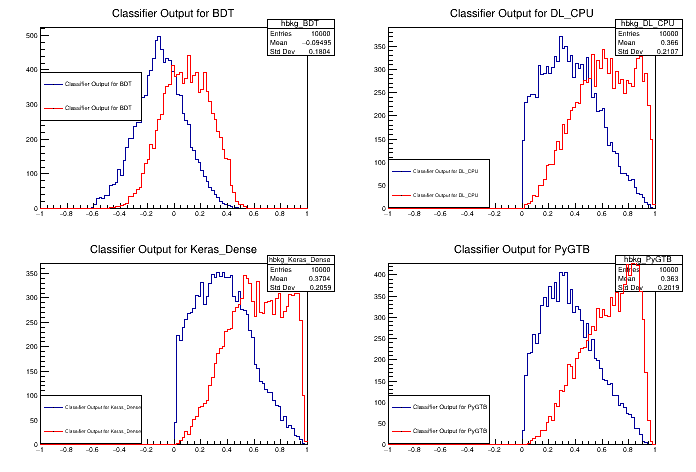

In [16]:
c1 = ROOT.TCanvas()
c1.DivideSquare( len(hb))
ipad = 0
for name in methodNames: 
    ipad += 1
    pad = c1.cd(ipad)
    h1 = hb[name]
    h1.Draw()
    h2 = hs[name]
    h2.SetLineColor(ROOT.kRed)
    h2.Draw('Same')
    pad.BuildLegend()
    
c1.Draw()

### Computing ROC Curve

We compute here the ROC curve from the vector of the classifier output for signal and background events. 
The interface for the TMVA::ROCCurve class requires  a std::vector of float types

In [17]:
i = 0
roc = []
c2 = ROOT.TCanvas()
for name in methodNames: 
    vsig = ROOT.std.vector('float')(nevt)
    vbkg = ROOT.std.vector('float')(nevt)
    for ievt in range(0,nevt): 
        vsig[ievt] = sig_result[i,ievt]
        vbkg[ievt] = bkg_result[i,ievt]
    roc.append ( TMVA.ROCCurve(vsig,vbkg) )
    print name,' ROC Integral ',roc[i].GetROCIntegral()
    gr = roc[i].GetROCCurve()
    gr.SetLineColor(i+1)
    gr.SetTitle(name)
    if (i==0): 
        gr.Draw('AL')
    else:
        gr.Draw("L")
    i += 1
    


BDT  ROC Integral  0.765787885
DL_CPU  ROC Integral  0.785205905
Keras_Dense  ROC Integral  0.789810875
PyGTB  ROC Integral  0.82779374


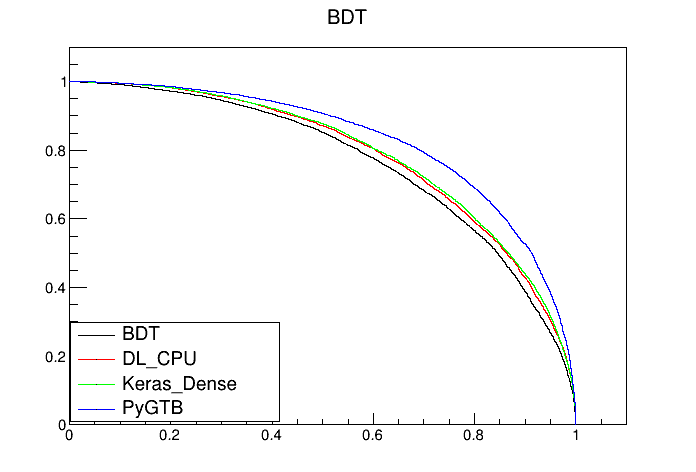

In [18]:
c2.BuildLegend()
c2.Draw()